## Contexto

Una entidad bancaria acaba de realizar una campaña de marketing, cuyo objetivo buscaba lograr que los clientes contactados depositaran sus ahorros a plazo fijo. Los resultados fueron peor de lo esperado.
Esta campaña se enfocó en un 10% de la cartera total de clientes del banco.

El banco contrata nuestros servicios como científic@ de datos y nos comunica los siguintes objetivos:

* Repetir una o más campañas en el transcurso de los siguientes 18 meses. 
* Maximizar la tasa de conversión de las mismas y entender los factores que influyen en esta tasa.

El banco nos provee la lista de los ~4.5K clientes ("clientes.csv") que fueron contactados durante esta última campaña y nos informa que por el momento NO nos proveerá de mas datos que estos.

Nuestra tarea consiste en ayudar al banco a cumplir sus objetivos.

### Metadata

#### Datos clientes
1. age: edad del cliente
2. job: tipo de trabajo
3. marital: estado civil
4. education: nivel de educación
5. default: indica si el cliente registra algún default crediticio
5. balance: saldo en dólares de la caja de ahorro del cliente
6. housing: indica si el cliente posee un préstamo hipotecario
7. loan: indica si el cliente posee algún préstamo personal

#### Datos del último contacto de la campaña actual
9. contact: canal de contacto
10. day: día de último contacto
11. month: mes de último contacto
12. duration: duracion del último contacto
13. campaign: cantidad de contactos hechos durante la campañ para el cliente especificado

#### Otros datos
14. pdays: días transcurridos desde el último contacto por una campaña previa
15. previous: cantidad de contactos previo a esta campaña
16. poutcome: resultado de la campaña previa

#### Resultado campaña actual
17. y - Indica si el cliente realizó depósito a plazo fijo(binaria: 'yes','no')

In [1]:
%ls

Modelando_Resultados_de_Marketing_Telefónico-compartir.ipynb
Presentation1.pptx
clientes.csv
readme.docx
~$Presentation1.pptx


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import numpy as np

In [3]:
df = pd.read_csv('clientes.csv', sep=';')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [6]:
df.contact.unique()

array(['cellular', 'unknown', 'telephone'], dtype=object)

In [7]:
def get_missing_values(dataframe):
    for column in dataframe.columns:
        if 'unknown' in  dataframe[column].value_counts():
            perc = round(len(dataframe[dataframe[column]=='unknown'])/len(df[column]) * 100)
            print(f'{column} has  {perc} % of missing values')

In [8]:
get_missing_values(df)

job has  1 % of missing values
education has  4 % of missing values
contact has  29 % of missing values
poutcome has  82 % of missing values


In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


<AxesSubplot:>

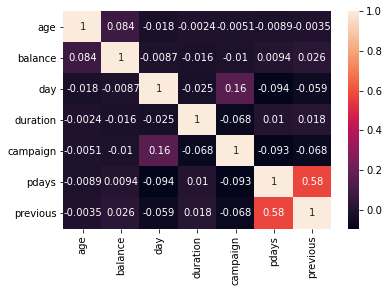

In [10]:
df.corr()
sns.heatmap(df.corr(), annot=True)

Existe una correlacion entre las variables previous y pdays lo cual es esperable ya que una variable indica si fue contactado anteriormente y la otra los dias corridos desde el ultimo contacto

## Balance

/Users/foxtrot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


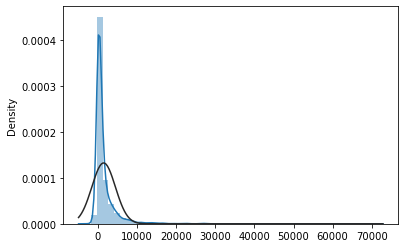

In [11]:
sns.distplot(x=df['balance'], fit=norm);

In [12]:
#kurtosis y skewness
from scipy.stats import kurtosis, skew

In [13]:
k=kurtosis(df.balance)
sk=skew(df.balance)
print(f'skewness: {sk}')
print(f'kurtosis: {k}')

skewness: 6.5942417478272635
kurtosis: 88.29128025001411


In [14]:
print(f'balance max: {df.balance.max()}')
print(f'balance min: {df.balance.min()}')
print(f'balance mean: {df.balance.mean()}')
print(f'balance median: {df.balance.median()}')
print(f'balance std: {df.balance.std()}')

balance max: 71188
balance min: -3313
balance mean: 1422.6578190665782
balance median: 444.0
balance std: 3009.6381424673496


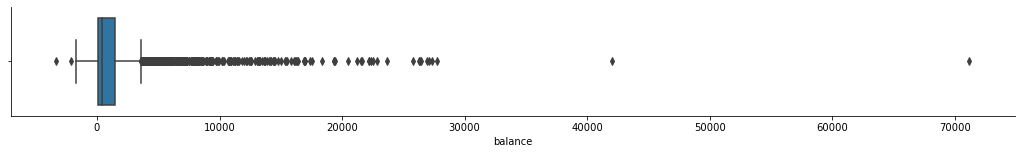

In [15]:
plt.figure(figsize=(18,2))
sns.boxplot(x=df.balance)
sns.despine()

In [16]:
q50 = df.balance.quantile(0.50)
q75 = df.balance.quantile(0.75)
q25 = df.balance.quantile(0.25)
IQR = q75 - q25
print(f'q25: {q25}')
print(f'q50: {q50}')
print(f'q75: {q75}')
print(f'IQR: {IQR}')

q25: 69.0
q50: 444.0
q75: 1480.0
IQR: 1411.0


In [17]:
upper_whisker = q75 + 1.5 * IQR
lower_whisker = q25 - 1.5 * IQR
lower_whisker,upper_whisker

(-2047.5, 3596.5)

In [18]:
#outliers
len(df[df['balance']<lower_whisker])

2

In [19]:
#outliers
len(df[df['balance']>upper_whisker])

504

### balance vs job

<AxesSubplot:xlabel='balance', ylabel='job'>

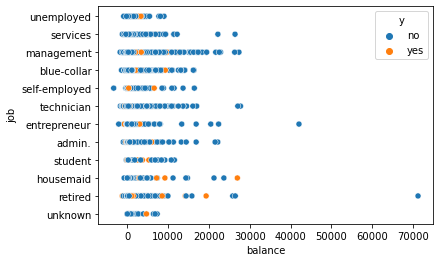

In [20]:
sns.scatterplot(x=df.balance, y=df.job, hue=df.y)

Definiendo limites

In [21]:
lower_treshold = df.balance.quantile(0.05)
upper_treshold = df.balance.quantile(0.95)
lower_treshold,upper_treshold

(-162.0, 6102.0)

In [22]:
ut = df.balance.mean() + 3 * df.balance.std()
ut

10451.572246468628

In [23]:
df = df[(df['balance']<40000) & (df['balance']>lower_whisker)]

In [24]:
def get_positive_prop(feature):
    d ={}
    for i,value in enumerate(df[feature].unique()):
        p = len(df[(df[feature]==value) & (df['y']=='yes')])
        n= len(df[(df[feature]==value) & (df['y']=='no')])
        value_prop= p/(p+n)
        value_prop = round(value_prop*100,2)
        d[f'{value}'] = value_prop
    d = sorted(d.items(), key=lambda x: x[1], reverse=True)

    for i in d:
        print(f'{i[0]}: {i[1]}%')
#    return d

<AxesSubplot:xlabel='balance', ylabel='job'>

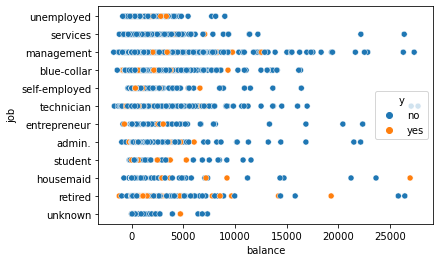

In [25]:
sns.scatterplot(x=df.balance, y=df.job, hue=df.y)

Clientes que realizaron el deposito segun el tipo de trabajo

In [26]:
get_positive_prop('job')

retired: 23.58%
student: 22.62%
unknown: 18.42%
management: 13.52%
housemaid: 12.5%
admin.: 12.13%
self-employed: 10.99%
technician: 10.81%
unemployed: 10.16%
services: 9.11%
entrepreneur: 9.04%
blue-collar: 7.29%


Los clientes que tienen saldos por debajo de 10000 son los que tienden a realizar el deposito.
Los retirados y los estudiantes son los mas propensos a realizar el deposito, mientras que los obreros (blue-collar) suelen ser los que menos contratan

### balance vs target

In [27]:
def define_balance_sign(balance):
    ''' clasifica el saldo del cliente entre negativos, neutros y positivos'''
    if balance==0:
        return 0
    elif balance>0:
        return 1
    else:
        return -1
df['balance_sign'] = df.balance.apply(lambda x: define_balance_sign(x))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balance_sign
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,1
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,1
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,1
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,1
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,0


<AxesSubplot:xlabel='balance_sign', ylabel='count'>

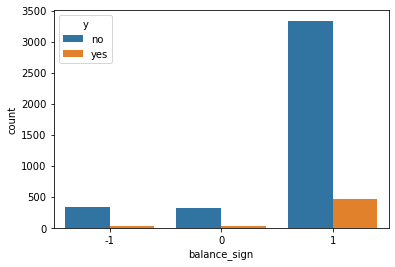

In [28]:
sns.countplot(x=df.balance_sign,hue=df.y)

In [29]:
get_positive_prop('balance_sign')

1: 12.14%
-1: 8.52%
0: 8.12%


Los clientes con saldo positivo son mas propensos a realizar el deposito

## Campaign (numero de llamadas)

### numero de llamadas vs duracion

<AxesSubplot:xlabel='campaign', ylabel='duration'>

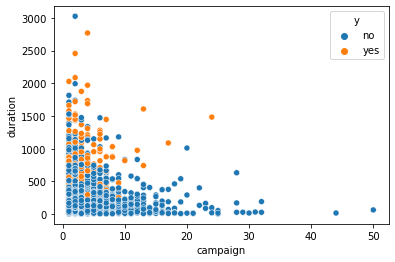

In [30]:
sns.scatterplot(x=df.campaign, y=df.duration, hue=df.y)

Los clientes contactados menos de 10 veces suelen realizar el deposito (los clientes contactados mas de 10 veces no suelen realizar la contratacion)
La duracion de las llamadas tiende a caer a medida que aumenta el numero de contactos
A medida que aumenta la duracion de la llamada (dentro de los primeros contactos) aumentan las probabilidades de que el cliente realice el deposito

## Age

/Users/foxtrot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


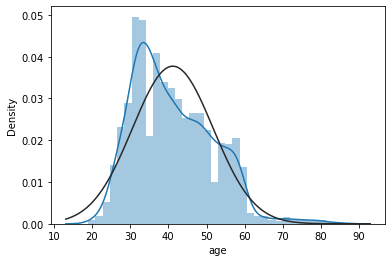

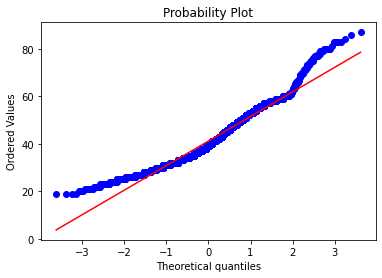

In [31]:
sns.distplot(df['age'], fit=norm);
fig = plt.figure()
res = stats.probplot(x=df['age'], plot=plt)

In [32]:
df_unk_edu = df.loc[df['education']=='unknown']

<AxesSubplot:xlabel='age'>

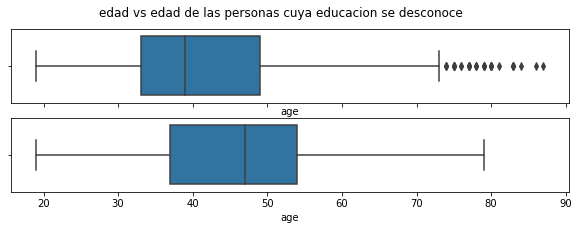

In [33]:
fig, axes = plt.subplots(2, 1, figsize=(10,3),sharex=True)
fig.suptitle('edad vs edad de las personas cuya educacion se desconoce')
sns.boxplot(ax=axes[0],x=df.age)
sns.boxplot(ax=axes[1],x=df_unk_edu.age)

### Age vs duration

<AxesSubplot:xlabel='age', ylabel='duration'>

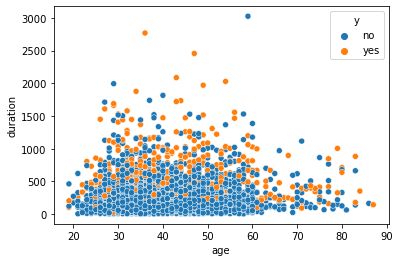

In [34]:
sns.scatterplot(x=df.age, y=df.duration, hue=df.y)

El tiempo de las llamadas se acorta en clientes muy jovenes o ancianos

## Education

<AxesSubplot:xlabel='education', ylabel='count'>

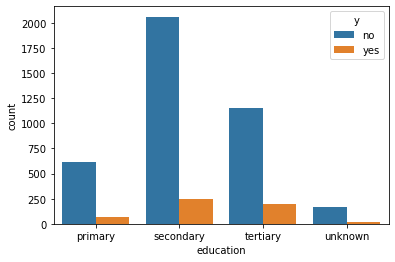

In [35]:
sns.countplot(x=df.education, hue=df.y)

In [36]:
get_positive_prop('education')

tertiary: 14.32%
secondary: 10.63%
unknown: 10.16%
primary: 9.45%


Los clientes con nivel de educacion terciario suelen realizar mas contrataciones seguidos por aquellos con estudios secundarios

## Contact

### contact vs target

<AxesSubplot:xlabel='contact', ylabel='count'>

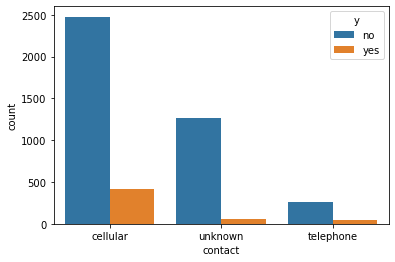

In [37]:
sns.countplot(x = df['contact'], hue= df['y'])

In [38]:
df.contact.value_counts()

cellular     2893
unknown      1323
telephone     301
Name: contact, dtype: int64

In [39]:
get_positive_prop('contact')

telephone: 14.62%
cellular: 14.38%
unknown: 4.61%


Considerando que tanto los clientes contactados por telefono como los contactados por celular tuvieron el mismo porcentaje de aceptacion de la campania (14% ) y que un 29% de los datos son desconocidos se puede descartar esta columna como un factor predictivo determinante

## Month

### Month vs campaign

<AxesSubplot:xlabel='month', ylabel='campaign'>

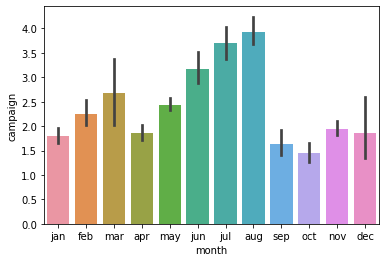

In [40]:
order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
sns.barplot(x=df.month,y=df.campaign,order=order)

<AxesSubplot:xlabel='month', ylabel='count'>

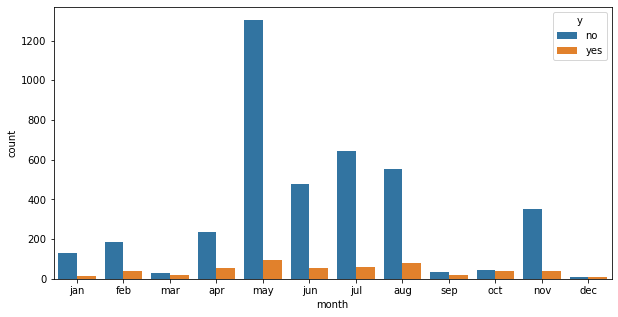

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(x=df.month,hue=df.y,order=order)

In [42]:
get_positive_prop('month')

oct: 46.84%
dec: 45.0%
mar: 42.86%
sep: 32.69%
apr: 19.11%
feb: 17.12%
aug: 12.5%
jan: 10.81%
jun: 10.36%
nov: 10.03%
jul: 8.65%
may: 6.66%


In [43]:
#cantidad de contratos positivos por mes
df_pos = df.loc[df['y']=='yes','month']
df_pos.value_counts()

may    93
aug    79
jul    61
apr    56
jun    55
nov    39
feb    38
oct    37
mar    21
sep    17
jan    16
dec     9
Name: month, dtype: int64

/Users/foxtrot/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

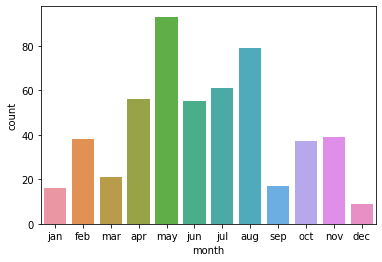

In [44]:
sns.countplot(df_pos, order=order)

En los meses de mayo, junio y julio se realizan la mayor cantidad de contactos con clientes y tambien la mayor cantidad de contrataciones de depositos a plazo fijo. Sin embargo la proporcion de contratos realizados respecto de la cantidad de contactos es mayor en los meses de octubre y diciembre

## Default

<AxesSubplot:xlabel='default', ylabel='count'>

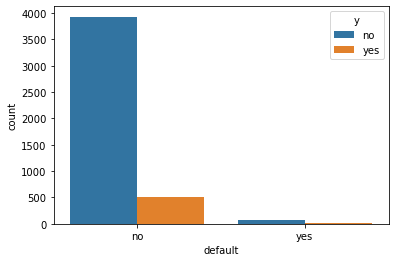

In [45]:
sns.countplot(x=df.default,hue=df.y)

In [46]:
get_positive_prop('default')

yes: 12.16%
no: 11.52%


## Housing y Loan

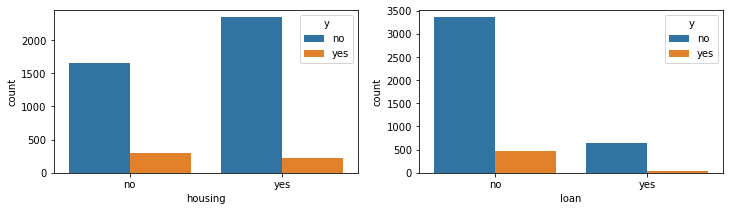

In [47]:
def plot_cat(columns):
    fig,axes=plt.subplots(1,2,figsize=(12,3))
    for i,column in enumerate(columns):
        sns.countplot(ax=axes[i],x=df[column],hue=df.y)
selected_columns = ['housing','loan']
plot_cat(selected_columns)

In [48]:
selected_columns = ['housing','loan']
for columns in selected_columns:
    print(f'\n{columns}:')
    get_positive_prop(columns)


housing:
no: 15.36%
yes: 8.6%

loan:
no: 12.49%
yes: 6.24%


De los clientes que no cuentan con un prestamo hipotecario, el 15% realizo la contratacion, mientras que solo el 8% de los clientes que si cuentan con hipotecas realizaron la contratacion.

El 12 % de los clientes que no sacaron prestamos personales realizo la contratacion contra el 6% de los clientes que si contaban con prestamos personales y realizaron la contratacion

Los clientes que no cuentan con prestamos o prestamos hipotecarios son mas propensos a realizar la contratacion del deposito a plazo fijo


## Pdays

In [49]:
df.pdays.value_counts()

-1      3701
 182      23
 183      20
 363      12
 92       12
        ... 
 118       1
 386       1
 63        1
 81        1
 234       1
Name: pdays, Length: 292, dtype: int64

In [50]:
def define_pcontact_type(pdays):
    ''' clasifica los contactos previos a la campania actual entre no contactados, contactos recientes o viejos'''
    if pdays==-1:
        return 'no'
    elif pdays<=30:
        return 'recently'
    else:
        return 'old'

In [51]:
# crea una nueva variable tipo de contacto previo
df['pcontact_type']=df['pdays'].apply(lambda x: define_pcontact_type(x))

<AxesSubplot:xlabel='pcontact_type', ylabel='count'>

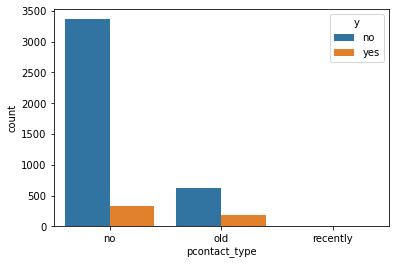

In [52]:
sns.countplot(x=df.pcontact_type,hue=df.y)

In [53]:
get_positive_prop('pcontact_type')

old: 22.72%
recently: 13.33%
no: 9.11%


# Feature Engineering

In [54]:
get_missing_values(df)

job has  1 % of missing values
education has  4 % of missing values
contact has  29 % of missing values
poutcome has  82 % of missing values


#### random sampling imputation

In [55]:
df.education.value_counts()

secondary    2305
tertiary     1348
primary       677
unknown       187
Name: education, dtype: int64

In [56]:
def get_random_samples(column):
    ''' imputa un valor random a un registro de una feature que tenga valor unknown'''
    if len(df[df[column]=='unknown'])!=0:
        for i in df[df[column]=='unknown'].index:
            df.loc[i,column] = df[df[column]!='unknown'][column].sample(1,replace=True,ignore_index=True)[0]

In [57]:
get_random_samples('education')

In [58]:
df.education.value_counts()

secondary    2401
tertiary     1407
primary       709
Name: education, dtype: int64

In [59]:
df.job.value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          229
self-employed    182
entrepreneur     166
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [60]:
get_random_samples('job')

In [61]:
df.job.value_counts()

management       975
blue-collar      955
technician       777
admin.           482
services         419
retired          230
self-employed    184
entrepreneur     168
unemployed       129
housemaid        113
student           85
Name: job, dtype: int64

como se menciono en el analisis exploratorio consideramos que la variable 'contact' no es relevante a la hora de determinar si un cliente va a contratar el deposito.
La variable 'poutcome' tiene 82% de valores desconocidos.
Se procede a borrar estas 2 columnas del dataset

In [62]:
df.drop(columns=['contact','poutcome'],inplace=True)

In [63]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,balance_sign,pcontact_type
0,30,unemployed,married,primary,no,1787,no,no,19,oct,79,1,-1,0,no,1,no
1,33,services,married,secondary,no,4789,yes,yes,11,may,220,1,339,4,no,1,old
2,35,management,single,tertiary,no,1350,yes,no,16,apr,185,1,330,1,no,1,old
3,30,management,married,tertiary,no,1476,yes,yes,3,jun,199,4,-1,0,no,1,no
4,59,blue-collar,married,secondary,no,0,yes,no,5,may,226,1,-1,0,no,0,no


Gaussian Transformation

In [64]:
df['age'] = np.log(df['age'])

/Users/foxtrot/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


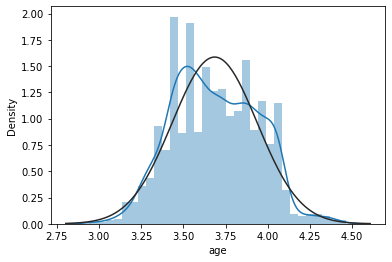

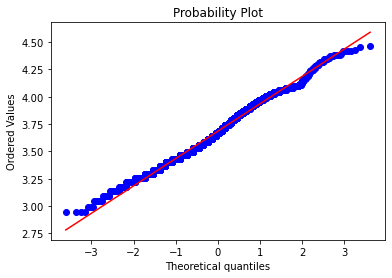

In [65]:
sns.distplot(df['age'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['age'], plot=plt)

In [66]:
from sklearn.preprocessing import StandardScaler
selected_columns = ['age','balance','duration','pdays','previous']
scaler = StandardScaler()
df[selected_columns] = scaler.fit_transform(df[selected_columns])

In [67]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,balance_sign,pcontact_type
0,-1.130630,unemployed,married,primary,no,0.140245,no,no,19,oct,-0.711906,1,-0.407428,-0.320569,no,1,no
1,-0.751740,services,married,secondary,no,1.228263,yes,yes,11,may,-0.169445,1,2.987580,2.040639,no,1,old
2,-0.517830,management,single,tertiary,no,-0.018137,yes,no,16,apr,-0.304098,1,2.897713,0.269733,no,1,old
3,-1.130630,management,married,tertiary,no,0.027529,yes,yes,3,jun,-0.250237,4,-0.407428,-0.320569,no,1,no
4,1.558048,blue-collar,married,secondary,no,-0.507419,yes,no,5,may,-0.146361,1,-0.407428,-0.320569,no,0,no


Target guided ordinal encoding

In [68]:
df['y']=pd.get_dummies(df.y,drop_first=True)

In [69]:
df.groupby(['marital'])['y'].mean()

marital
divorced    0.145833
married     0.099177
single      0.139632
Name: y, dtype: float64

In [70]:
ordinal_labels=df.groupby(['marital'])['y'].mean().sort_values().index
ordinal_labels

Index(['married', 'single', 'divorced'], dtype='object', name='marital')

In [71]:
ordinal_labels={k:i for i,k in enumerate(ordinal_labels,0)}
ordinal_labels

{'married': 0, 'single': 1, 'divorced': 2}

In [72]:
df['marital_ordinal']=df['marital'].map(ordinal_labels)
df.drop(['marital'], axis=1,inplace=True)

In [73]:
df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,balance_sign,pcontact_type,marital_ordinal
0,-1.130630,unemployed,primary,no,0.140245,no,no,19,oct,-0.711906,1,-0.407428,-0.320569,0,1,no,0
1,-0.751740,services,secondary,no,1.228263,yes,yes,11,may,-0.169445,1,2.987580,2.040639,0,1,old,0
2,-0.517830,management,tertiary,no,-0.018137,yes,no,16,apr,-0.304098,1,2.897713,0.269733,0,1,old,1
3,-1.130630,management,tertiary,no,0.027529,yes,yes,3,jun,-0.250237,4,-0.407428,-0.320569,0,1,no,0
4,1.558048,blue-collar,secondary,no,-0.507419,yes,no,5,may,-0.146361,1,-0.407428,-0.320569,0,0,no,0


Label encoding

In [74]:
education_dict={'primary':1,'secondary':2,'tertiary':3}
df['education']= df['education'].map(education_dict)

In [75]:
month_dict={'jan':1, 'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
df['month']= df['month'].map(month_dict)

In [76]:
df.head()

,age,job,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y,balance_sign,pcontact_type,marital_ordinal
0,-1.130630,unemployed,1,no,0.140245,no,no,19,10,-0.711906,1,-0.407428,-0.320569,0,1,no,0
1,-0.751740,services,2,no,1.228263,yes,yes,11,5,-0.169445,1,2.987580,2.040639,0,1,old,0
2,-0.517830,management,3,no,-0.018137,yes,no,16,4,-0.304098,1,2.897713,0.269733,0,1,old,1
3,-1.130630,management,3,no,0.027529,yes,yes,3,6,-0.250237,4,-0.407428,-0.320569,0,1,no,0
4,1.558048,blue-collar,2,no,-0.507419,yes,no,5,5,-0.146361,1,-0.407428,-0.320569,0,0,no,0


One hot encoding

In [77]:
selected_columns =['job','default','housing','loan','pcontact_type']
df = pd.get_dummies(df,columns=selected_columns,drop_first=True)

In [78]:
df.shape

(4517, 27)

## Model selection

In [79]:
y = df.y

In [80]:
df.drop(columns=['y'],inplace=True)

In [81]:
X = df

oversampling

In [82]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

In [83]:
print(f'Original dataset shape {Counter(y)}')
smt = SMOTE(random_state=20)
train_input_new, train_output_new = smt.fit_resample(X, y)
#train_output_new = train_output_new['yes']
print(f'Nuevo dataset shape {Counter(train_output_new)}')
train_input_new = pd.DataFrame(train_input_new, columns = list(X.columns))
X_train, X_test, y_train, y_test = train_test_split(train_input_new, train_output_new, test_size=0.20, random_state=0)


Original dataset shape Counter({0: 3996, 1: 521})
Nuevo dataset shape Counter({0: 3996, 1: 3996})


Model selection

In [84]:
import warnings
warnings.filterwarnings('ignore')

In [85]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

lr_cv = LogisticRegression(random_state=0)
rf_cv=RandomForestClassifier()
knn_cv=KNeighborsClassifier()
svc_cv=SVC()
xgb_cv=xgb.XGBClassifier(eval_metric='mlogloss')
cv_models=[lr_cv,rf_cv,knn_cv,svc_cv,xgb_cv]


for i,model in enumerate(cv_models):
    print(f'''{model.__class__.__name__} Test Acurracy {cross_val_score(model, X_test, y_test, cv=10, scoring ='accuracy').mean()}''')
    
    

LogisticRegression Test Acurracy 0.8786831761006291
RandomForestClassifier Test Acurracy 0.898069968553459
KNeighborsClassifier Test Acurracy 0.8574213836477987
SVC Test Acurracy 0.8399056603773584
XGBClassifier Test Acurracy 0.9024488993710691


Los 3 mejores modelos son: LogisticRegresion, RandomForest y XGBoost

## Logistic Reggresion

In [86]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': np.logspace(-4, 4, 50),
             'penalty':['l1', 'l2']}
clf = GridSearchCV(LogisticRegression(random_state=0), param_grid,cv=5, verbose=0,n_jobs=-1)
best_model = clf.fit(X_train,y_train)
print(best_model.best_estimator_)
print("El accuracy promedio del modelo es:",best_model.score(X_test,y_test))

LogisticRegression(C=0.2682695795279725, random_state=0)
El accuracy promedio del modelo es: 0.8761726078799249


## Random Forest

In [87]:
rm = RandomForestClassifier(n_estimators = 10, max_depth=25, criterion = "gini", min_samples_split=10)
rm.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, min_samples_split=10, n_estimators=10)

In [88]:
rm_prd = rm.predict(X_test)

In [89]:
from sklearn.metrics import confusion_matrix
cmtx = pd.DataFrame(
    confusion_matrix(y_test, rm_prd), 
    index=['actual:0', 'actual:1'], 
    columns=['pred:0', 'pred:1']
)
print(cmtx)

          pred:0  pred:1
actual:0     717      79
actual:1      59     744


In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score , f1_score
print(f"Accuracy: {accuracy_score(y_test, rm_prd):.2f}")
print(f"Precision: {precision_score(y_test, rm_prd):.2f}")
print(f"Recall: {recall_score(y_test, rm_prd):.2f}")
print(f"f1Score: {f1_score(y_test, rm_prd):.2f}")

Accuracy: 0.91
Precision: 0.90
Recall: 0.93
f1Score: 0.92


In [91]:
from sklearn.model_selection import RandomizedSearchCV
# Numero de arboles
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Numero de features a considerar en cada split
max_features = ['auto', 'sqrt']
# Numero maximo de niveles
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimo numero de samples requeridos para dividir un nodo
min_samples_split = [2, 5, 10]
# Minimo numero de samples requeridos en cada leaf node
min_samples_leaf = [1, 2, 4]
# Metodo para seleccionar samples para entrenar cada arbol(with or without replacement)
bootstrap = [True, False]

In [92]:

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [93]:
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [94]:
rf_random = RandomizedSearchCV(estimator = rf_cv, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [95]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [96]:
rf_best=rf_random.best_estimator_

In [97]:
rf_prd = rf_best.predict(X_test)

In [98]:
from sklearn.metrics import confusion_matrix
cmtx = pd.DataFrame(
    confusion_matrix(y_test, rf_prd), 
    index=['actual:0', 'actual:1'], 
    columns=['pred:0', 'pred:1']
)
print(cmtx)

          pred:0  pred:1
actual:0     741      55
actual:1      53     750


In [99]:
print(f"Accuracy is {accuracy_score(y_test, rf_prd):.2f}")
print(f"Precision is {precision_score(y_test, rf_prd):.2f}")
print(f"Recall is {recall_score(y_test, rf_prd):.2f}")
print(f"f1Score is {f1_score(y_test, rf_prd):.2f}")

Accuracy is 0.93
Precision is 0.93
Recall is 0.93
f1Score is 0.93


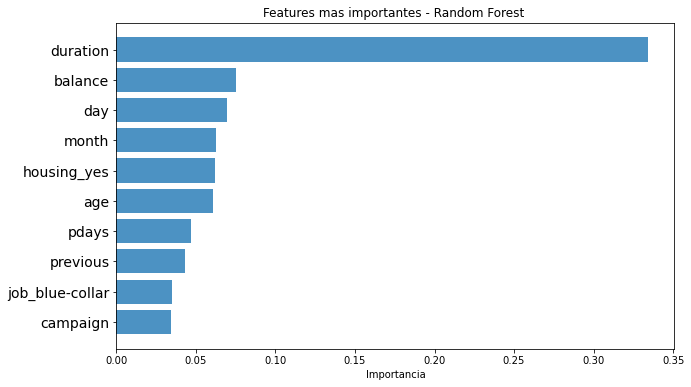

In [100]:
feature_names = X_train.columns
feature_imports = rf_best.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importancia')
plt.title('Features mas importantes - Random Forest ')
plt.show()

## XGBoost

In [101]:
xgb_model = xgb.XGBClassifier(max_depth=10,n_estimators=100)
xgb_model.fit(X_train,y_train)

[16:43:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
xgb_pred=xgb_model.predict(X_test)
xgb_pred

array([1, 0, 1, ..., 0, 1, 1], dtype=uint8)

In [103]:
cmtx = pd.DataFrame(
    confusion_matrix(y_test, xgb_pred), 
    index=['actual:0', 'actual:1'], 
    columns=['pred:0', 'pred:1']
)
print(cmtx)

          pred:0  pred:1
actual:0     740      56
actual:1      35     768


In [104]:
print(f"Accuracy is {accuracy_score(y_test, xgb_pred):.2f}")
print(f"Precision is {precision_score(y_test, xgb_pred):.2f}")
print(f"Recall is {recall_score(y_test, xgb_pred):.2f}")
print(f"f1Score is {f1_score(y_test, xgb_pred):.2f}")

Accuracy is 0.94
Precision is 0.93
Recall is 0.96
f1Score is 0.94


Features mas importantes

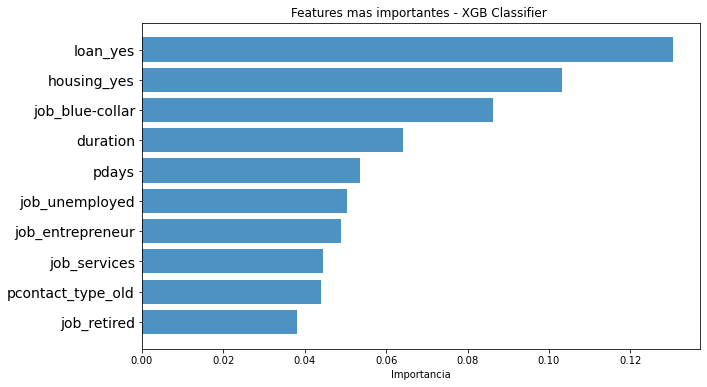

In [105]:
feature_names = X_train.columns
feature_imports = xgb_model.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importancia')
plt.title('Features mas importantes - XGB Classifier ')
plt.show()

## Conclusión

* Los prestamos, las hipotecas y la duración de las llamadas son factores determinantes que influyen en el resultado de la campaña. 

* El trabajo y la educación también actúan como factores decisivos cruciales e influyen mucho en el resultado.

* Los primeros contactos son determinantes a la hora de conseguir que el cliente realice el depósito.
